In [19]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [20]:
df = pd.read_csv("Advertising.csv")
df.head(5)

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


### **Exploratory Data Analysis** *(EDA)*

In [ ]:
df.drop(columns=["Unnamed: 0"], inplace=True)

In [22]:
df.dtypes

TV           float64
Radio        float64
Newspaper    float64
Sales        float64
dtype: object

> Pair Plot

<Figure size 1500x1000 with 0 Axes>

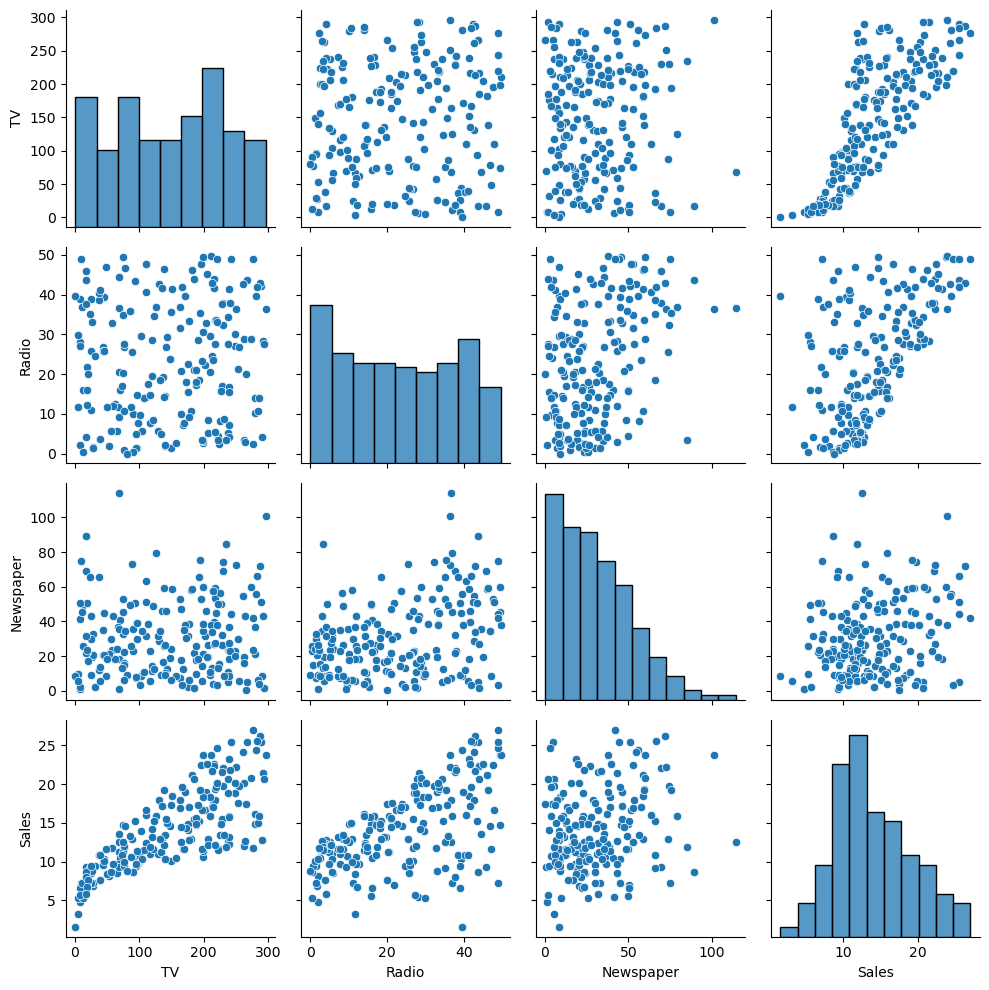

In [49]:
plt.figure(figsize=(15,10))
sns.pairplot(df)
plt.tight_layout()
plt.show()

> Correlation Heatmap

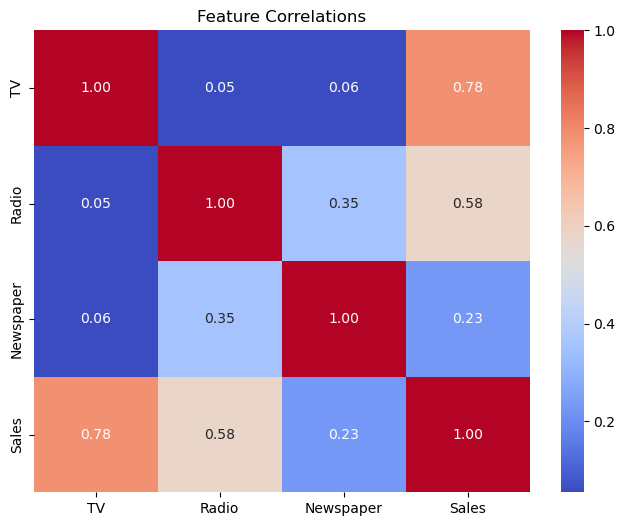

In [ ]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm', fmt='.2f')
plt.title("Feature Correlations")
plt.show()

> Regression Plots 

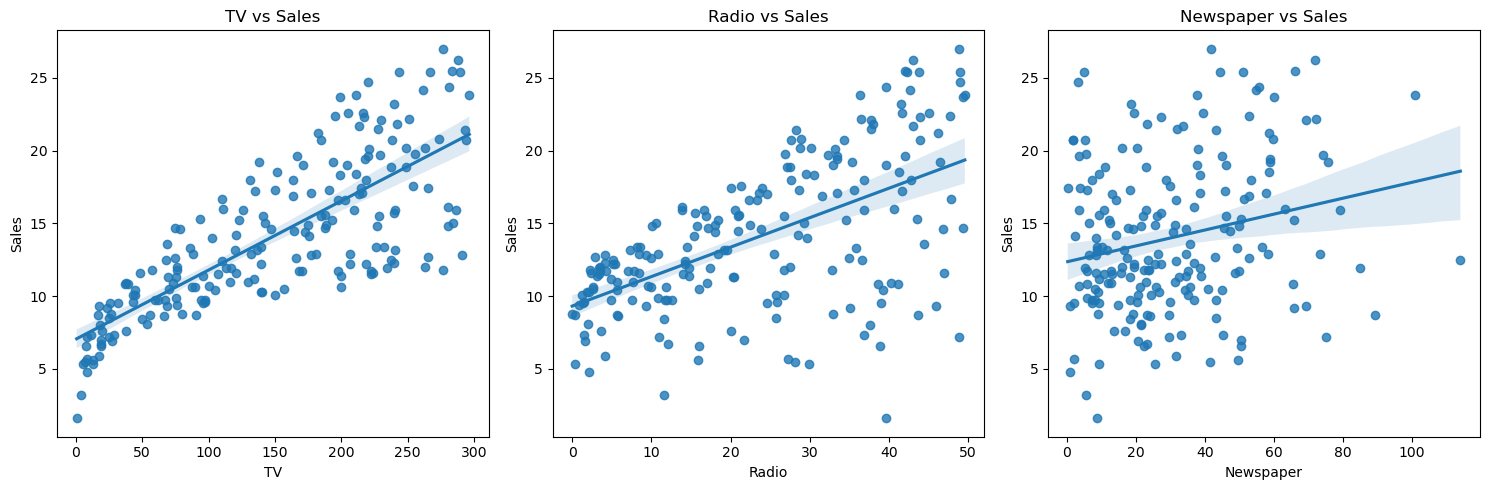

In [ ]:
fig, axes = plt.subplots(1, 3, figsize=(15, 5))
sns.regplot(x=df['TV'], y=df['Sales'], ax=axes[0])
axes[0].set_title("TV vs Sales")
sns.regplot(x=df['Radio'], y=df['Sales'], ax=axes[1])
axes[1].set_title("Radio vs Sales")
sns.regplot(x=df['Newspaper'], y=df['Sales'], ax=axes[2])
axes[2].set_title("Newspaper vs Sales")
plt.tight_layout()
plt.show()

In [25]:
X = df[["TV", "Radio", "Newspaper"]]
y = df['Sales']

X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)

lr_model = LinearRegression()
lr_model.fit(X_train,y_train)

lr_model

LinearRegression()

In [47]:
y_pred_lr = lr_model.predict(X_test)

mae = mean_absolute_error(y_test, y_pred_lr)
mse = mean_squared_error(y_test, y_pred_lr)
r2 = r2_score(y_test, y_pred_lr)

print(f"MAE: {mae}")
print(f"R2_Score: {r2}")
print(f"MSE: {mse}")

MAE: 1.4607567168117606
R2_Score: 0.899438024100912
MSE: 3.1740973539761046


In [53]:
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

rf_model

RandomForestRegressor(random_state=42)

In [ ]:
def evaluate_model(y_test, y_pred, model_name):
    mae = mean_absolute_error(y_test, y_pred)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"{model_name} Performance:")
    print(f"MAE: {mae:.2f}")
    print(f"MSE: {mse:.2f}")
    print(f"R2 Score: {r2:.2f}\n")   

evaluate_model(y_test, y_pred_lr, "Linear Regression")
evaluate_model(y_test, y_pred_rf, "Random Forest Regressor")

Linear Regression Performance:
MAE: 1.46
MSE: 3.17
R2 Score: 0.90

Random Forest Regressor Performance:
MAE: 0.62
MSE: 0.59
R2 Score: 0.98



> Feature Importance Plot

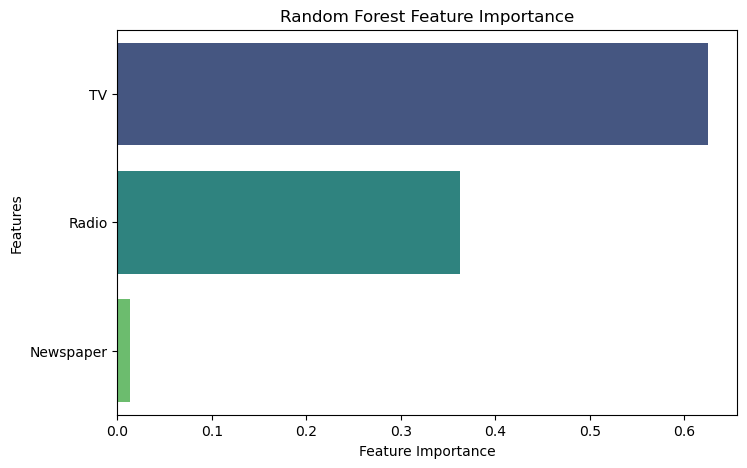

In [ ]:
feature_importances = rf_model.feature_importances_
features = X.columns
plt.figure(figsize=(8, 5))
sns.barplot(x=feature_importances, y=features, palette='viridis',hue=features,legend=False)
plt.xlabel("Feature Importance")
plt.ylabel("Features")
plt.title("Random Forest Feature Importance")
plt.show()

In [ ]:
rf_y_pred = rf_model.predict(X_test)
rf_y_pred

array([17.698, 21.804, 20.628,  6.793, 22.927, 13.379, 22.376,  9.688,
       11.826, 15.54 ,  7.344,  9.059, 12.109,  4.826, 10.522, 12.69 ,
        6.49 , 16.44 , 11.368, 19.732, 20.181, 12.884, 10.33 , 22.178,
        9.993,  9.006, 22.169, 12.676, 10.201,  5.296, 11.519, 10.904,
       22.165,  8.63 , 15.288, 20.56 , 12.147, 20.523, 12.271,  7.57 ])

In [ ]:
y_pred_lr = lr_model.predict(X_test)
y_pred_lr

array([16.4080242 , 20.88988209, 21.55384318, 10.60850256, 22.11237326,
       13.10559172, 21.05719192,  7.46101034, 13.60634581, 15.15506967,
        9.04831992,  6.65328312, 14.34554487,  8.90349333,  9.68959028,
       12.16494386,  8.73628397, 16.26507258, 10.27759582, 18.83109103,
       19.56036653, 13.25103464, 12.33620695, 21.30695132,  7.82740305,
        5.80957448, 20.75753231, 11.98138077,  9.18349576,  8.5066991 ,
       12.46646769, 10.00337695, 21.3876709 , 12.24966368, 18.26661538,
       20.13766267, 14.05514005, 20.85411186, 11.0174441 ,  4.56899622])

In [37]:
future_ad_spend = pd.DataFrame({
    'TV': [200],
    'Radio': [30],
    'Newspaper': [40]
})
future_sales = rf_model.predict(future_ad_spend)
print(f"Predicted Future Sales by Random Forest Regressor: {future_sales[0]:.2f}")

f_sales_lr = lr_model.predict(future_ad_spend)
print(f"Predicted Future Sales by Linear Regression Model: {future_sales[0]:.2f}")


Predicted Future Sales by Random Forest Regressor: 18.31
Predicted Future Sales by Linear Regression Model: 18.31


In [35]:
rf_score = rf_model.score(X_test, y_test)
print(f"Accuracy Score for Random Forest Regressor: {rf_score:.2f}")

lr_score = lr_model.score(X_test, y_test)
print(f"Accuracy Score for Linear Regression Model: {lr_score:.2f}")

Accuracy Score for Random Forest Regressor: 0.98
Accuracy Score for Linear Regression Model: 0.90
